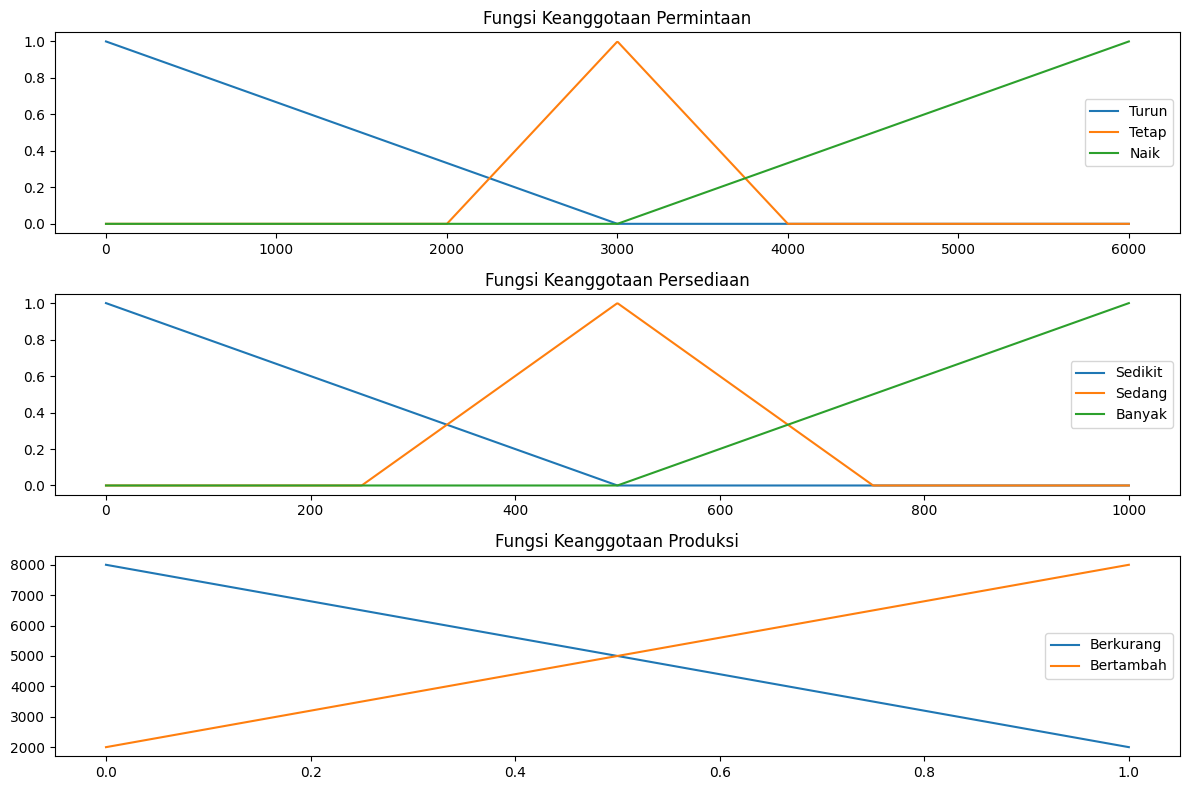

Masukkan nilai Permintaan (0-6000):  3500
Masukkan nilai Persediaan (0-1000):  600


Produksi yang dihasilkan: 5000.00


In [6]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

# Fungsi Keanggotaan
def permintaan_turun(x):
    return max((3000 - x) / 3000, 0)

def permintaan_tetap(x):
    return max(min((x - 2000) / 1000, (4000 - x) / 1000), 0)

def permintaan_naik(x):
    return max((x - 3000) / 3000, 0)

def persediaan_sedikit(y):
    return max((500 - y) / 500, 0)

def persediaan_sedang(y):
    return max(min((y - 250) / 250, (750 - y) / 250), 0)

def persediaan_banyak(y):
    return max((y - 500) / 500, 0)

def produksi_berkurang(α):
    return 8000 - α * (8000 - 2000)

def produksi_bertambah(α):
    return 2000 + α * (8000 - 2000)

# Visualisasi Fungsi Keanggotaan
def plot_membership():
    x = np.linspace(0, 6000, 1000)
    y = np.linspace(0, 1000, 1000)
    z = np.linspace(2000, 8000, 1000)

    # Permintaan
    turun = [permintaan_turun(i) for i in x]
    tetap = [permintaan_tetap(i) for i in x]
    naik = [permintaan_naik(i) for i in x]

    # Persediaan
    sedikit = [persediaan_sedikit(i) for i in y]
    sedang = [persediaan_sedang(i) for i in y]
    banyak = [persediaan_banyak(i) for i in y]

    # Produksi
    berkurang = [produksi_berkurang(α) for α in np.linspace(0, 1, 1000)]
    bertambah = [produksi_bertambah(α) for α in np.linspace(0, 1, 1000)]

    # Plot Permintaan
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(x, turun, label="Turun")
    plt.plot(x, tetap, label="Tetap")
    plt.plot(x, naik, label="Naik")
    plt.title("Fungsi Keanggotaan Permintaan")
    plt.legend()

    # Plot Persediaan
    plt.subplot(3, 1, 2)
    plt.plot(y, sedikit, label="Sedikit")
    plt.plot(y, sedang, label="Sedang")
    plt.plot(y, banyak, label="Banyak")
    plt.title("Fungsi Keanggotaan Persediaan")
    plt.legend()

    # Plot Produksi
    plt.subplot(3, 1, 3)
    plt.plot(np.linspace(0, 1, 1000), berkurang, label="Berkurang")
    plt.plot(np.linspace(0, 1, 1000), bertambah, label="Bertambah")
    plt.title("Fungsi Keanggotaan Produksi")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluasi Rule dan Inferensi
def fuzzy_inference(permintaan, persediaan):
    rules = []

    # Rule 1: Jika Permintaan Turun dan Persediaan Sedikit maka Bertambah
    α1 = min(permintaan_turun(permintaan), persediaan_sedikit(persediaan))
    z1 = produksi_bertambah(α1)
    rules.append((α1, z1))

    # Rule 2: Jika Permintaan Turun dan Persediaan Sedang maka Berkurang
    α2 = min(permintaan_turun(permintaan), persediaan_sedang(persediaan))
    z2 = produksi_berkurang(α2)
    rules.append((α2, z2))

    # Rule 3: Jika Permintaan Turun dan Persediaan Banyak maka Berkurang
    α3 = min(permintaan_turun(permintaan), persediaan_banyak(persediaan))
    z3 = produksi_berkurang(α3)
    rules.append((α3, z3))

    # Rule 4: Jika Permintaan Tetap dan Persediaan Sedikit maka Bertambah
    α4 = min(permintaan_tetap(permintaan), persediaan_sedikit(persediaan))
    z4 = produksi_bertambah(α4)
    rules.append((α4, z4))

    # Rule 5: Jika Permintaan Tetap dan Persediaan Sedang maka Berkurang
    α5 = min(permintaan_tetap(permintaan), persediaan_sedang(persediaan))
    z5 = produksi_berkurang(α5)
    rules.append((α5, z5))

    # Rule 6: Jika Permintaan Naik dan Persediaan Sedikit maka Bertambah
    α6 = min(permintaan_naik(permintaan), persediaan_sedikit(persediaan))
    z6 = produksi_bertambah(α6)
    rules.append((α6, z6))

    # Rule 7: Jika Permintaan Naik dan Persediaan Sedang maka Bertambah
    α7 = min(permintaan_naik(permintaan), persediaan_sedang(persediaan))
    z7 = produksi_bertambah(α7)
    rules.append((α7, z7))

    # Rule 8: Jika Permintaan Naik dan Persediaan Banyak maka Berkurang
    α8 = min(permintaan_naik(permintaan), persediaan_banyak(persediaan))
    z8 = produksi_berkurang(α8)
    rules.append((α8, z8))

    # Menghitung nilai produksi akhir (Tsukamoto: rata-rata tertimbang)
    numerator = sum(α * z for α, z in rules)
    denominator = sum(α for α, _ in rules)

    if denominator == 0:
        return 0
    return numerator / denominator

# Main Program
if __name__ == "__main__":
    # Plot Fungsi Keanggotaan
    plot_membership()

    # Input Permintaan dan Persediaan
    permintaan = float(input("Masukkan nilai Permintaan (0-6000): "))
    persediaan = float(input("Masukkan nilai Persediaan (0-1000): "))

    # Hitung Inferensi Fuzzy
    produksi = fuzzy_inference(permintaan, persediaan)
    print(f"Produksi yang dihasilkan: {produksi:.2f}")
    plt.show()